In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *



from calculate_metrics import Calculate_Metrics

#wmt modes

wmt_modes=[ "wmt_samples0", "wmt_samples1", "wmt_samples2_1","wmt_samples2_2", "wmt_samples3", "wmt_samples4", "wmt_samples5"]
gsm_modes=[ "gsm_samples1_1","gsm_samples1_2","gsm_samples1_3", "gsm_samples2"]
template_modes=["olmo_template", "llama_template"]
instruct_modes=["instruct"]


all_modes = [wmt_modes,gsm_modes, template_modes, instruct_modes]

def process_instruct(examples_df):
    instruct_metrics=["Helpfulness", "Completeness", "Understandability", "Conciseness", 'Harmlessness', "Interestingness"]
    instruct_tasks=['self_instruct_num_respondents_1_', 'anthropic_hh_rlhf_subset_hh_num_respondents_1_', 'vicuna_num_respondents_1_', 'koala_num_respondents_1_', 'anthropic_hh_rlhf_subset_red_team_num_respondents_1_', 'grammar_path_src_helm_benchmark_scenarios_best_chatgpt_prompts.yaml_tags_num_respondents_1_']
    examples_df.loc[examples_df['task_name'].isin(instruct_tasks), 'task_name'] = "Instruct"

    for col_name in instruct_metrics:
        if col_name in examples_df.columns:
            examples_df[col_name]=examples_df[col_name].replace(0, np.nan)
    return examples_df


x_metrics, y_metrics=None, None

metrics_dicts=[]
for process_gen_modes in all_modes:
    dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes)

    for key, df in dfs_by_model.items():
        dfs_by_model[key]=process_instruct(df)
    examples_df = pd.concat(list(dfs_by_model.values()))


    print(examples_df.columns)
    tasks=list(examples_df["task_name"].unique())
    assert len(tasks)==1

    print(f"task is {tasks[0]}")


    for model in dfs_by_model:
        model_details=get_model_details(model)

        myCalculateMetrics=Calculate_Metrics(dfs_by_model[model], compare_metric)
        metrics=myCalculateMetrics.get_best_metrics()
        x_metrics, y_metrics=myCalculateMetrics.get_x_y_cols()
        for key, item in model_details.items():
            new_key = key if key=="model_type" else "model_"+key
            metrics[new_key]=item
        if process_gen_modes[0] in template_modes:
            metrics["model_name"]=metrics["model_name"]+" template"
        metrics_dicts.append(metrics)
        metrics["task_name"]=tasks[0]


/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Index(['example_comet', 'beam_num', 'task_name', 'model', 'example_idx',
       'rank', 'suite', 'instanceID', 'text', 'completion_length',
       'output_logprob', 'isCompletion'],
      dtype='object')
task is wmt_14_language_pair_de_en_


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                        

mode is gsmtask_names is ['gsm_']
mode is gsmtask_names is ['gsm_']
mode is gsmtask_names is ['gsm_']
mode is gsmtask_names is ['gsm_']
Index(['beam_num', 'task_name', 'model', 'example_idx', 'rank', 'suite',
       'instanceID', 'text', 'completion_length', 'output_logprob',
       'isCompletion', 'final_num_exact_match', 'example_exact_match'],
      dtype='object')
task is gsm_


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
Index(['example_comet', 'beam_num', 'task_name', 'model', 'example_idx',
       'rank', 'suite', 'instanceID', 'text', 'completion_length',
       'output_logprob', 'isCompletion'],
      dtype='object')
task is wmt_14_language_pair_de_en_


----------------
 NOTE: ONLY PRINTING 4 tasks ----------------

mode is instructtask_names is ['self_instruct_num_respondents_1_', 'anthropic_hh_rlhf_subset_hh_num_respondents_1_', 'vicuna_num_respondents_1_', 'koala_num_respondents_1_', 'anthropic_hh_rlhf_subset_red_team_num_respondents_1_', 'grammar_path_src_helm_benchmark_scenarios_best_chatgpt_prompts.yaml_tags_num_respondents_1_']


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Index(['example_themis', 'Helpfulness', 'Completeness', 'Understandability',
       'Conciseness', 'Harmlessness', 'Interestingness', 'beam_num',
       'task_name', 'model', 'example_idx', 'rank', 'suite', 'instanceID',
       'text', 'completion_length', 'output_logprob', 'isCompletion'],
      dtype='object')
task is Instruct


In [2]:


all_df= pd.DataFrame.from_dict(metrics_dicts)
csv_file="/Users/lukecadigan/thesis/analysis/big_table.csv"
all_df.to_csv(csv_file, index=False)


In [3]:
print(all_df.columns)
print(all_df["task_name"].unique())
df=all_df[all_df["task_name"]=="wmt_14_language_pair_de_en_"]



Index(['Average Score', 'Entropy', 'Length Bias', 'PQ Slope', 'Peak Rank',
       'PQ Dropoff', 'model_name', 'model_size', 'model_suite', 'model_type',
       'task_name'],
      dtype='object')
['wmt_14_language_pair_de_en_' 'gsm_' 'Instruct']


In [4]:
# numeric_cols = ['Average Score', 'Entropy', 'Length Bias', 'PQ Slope', 'PQ Dropoff']

# # Create a new DataFrame with ranks (1 = lowest)
# ranked_df = df[numeric_cols].rank(method='min', ascending=True)

# # Optionally, add back non-numeric columns
# non_numeric_cols = ['model_name', 'model_size', 'model_suite', 'model_type', 'task_name']
# ranked_df[non_numeric_cols] = df[non_numeric_cols]

# # If you want the columns in original order:
# ranked_df = ranked_df[numeric_cols + non_numeric_cols]

# print(ranked_df.head())



models = list(df["model_name"].unique())
print(models)


['Llama 8B Instruct', 'Olmo 1B Instruct', 'Llama 1B Instruct', 'Olmo 7B Instruct', 'Olmo 13B Instruct', 'Qwen 0.6B', 'Qwen 1.7B', 'Qwen 4B', 'Qwen 8B', 'Olmo 7B SFT', 'Olmo 7B DPO', 'Olmo 13B DPO', 'Olmo 13B SFT', 'Llama 1B Base', 'Llama 8B Base', 'Olmo 1B Base', 'Olmo 7B Base', 'Olmo 13B Base', 'Olmo 13B Instruct template', 'Llama 8B Instruct template']


/var/folders/w4/6m47nb7x1cv2hsxbb89dmcz80000gn/T/ipykernel_20577/2226864567.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


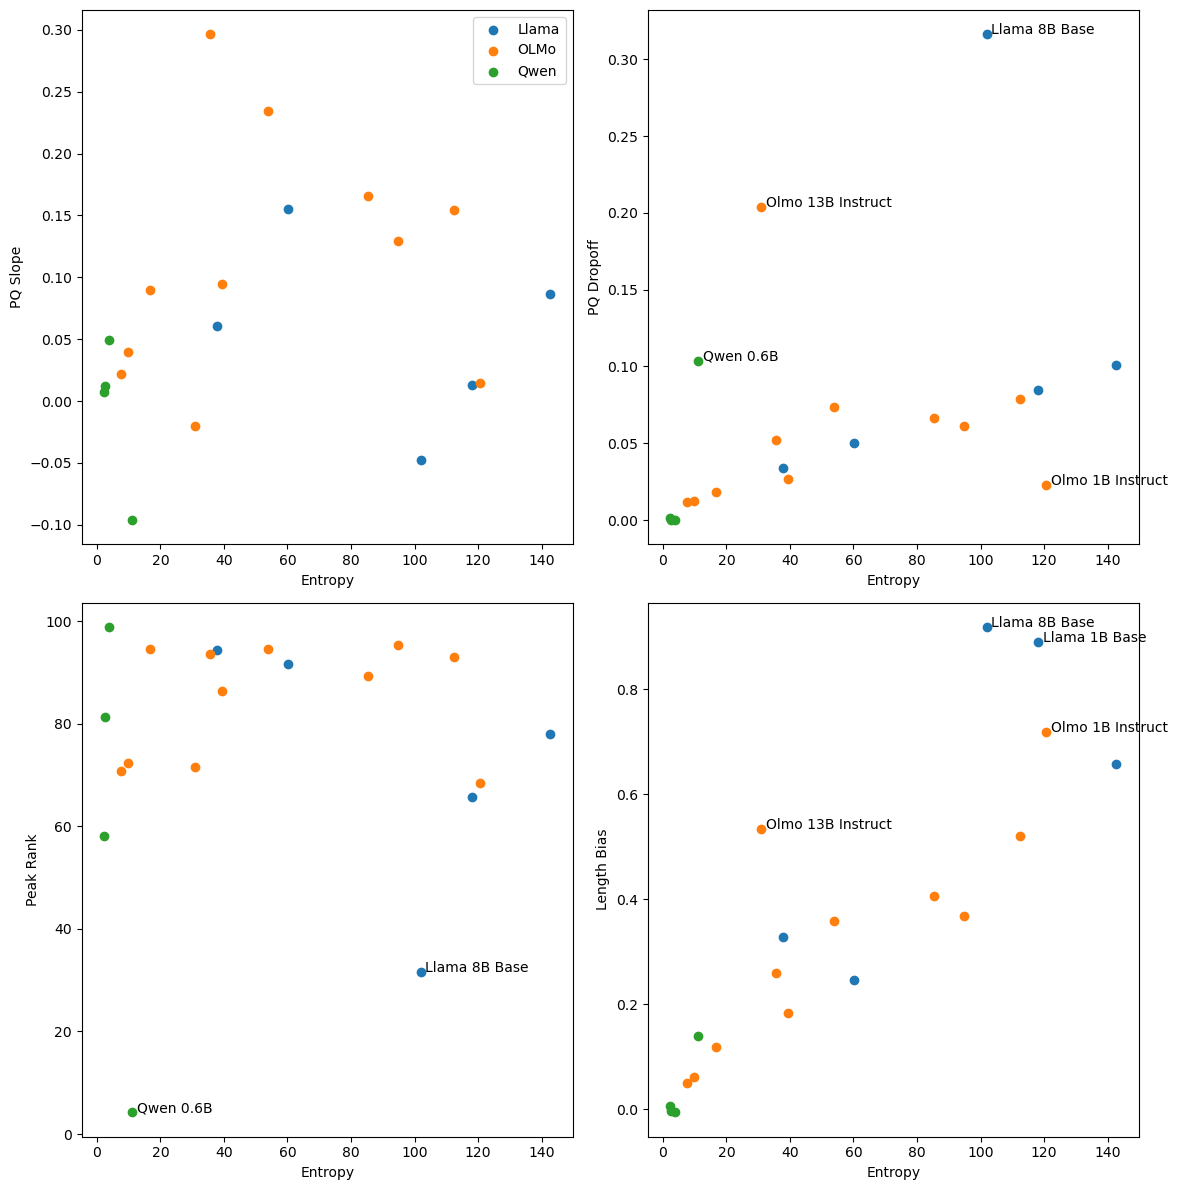

In [15]:
fig, axes=plt.subplots(2,2, figsize=(12, 12))
def simple_scatter(df, x_col,y_col, annotate_text=[], label_by="task_name", ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    for col_val in df[label_by].unique():
        filtered_df=df[df[label_by]==col_val]
        n=filtered_df["model_name"]
        x=list(filtered_df[x_col].values)
        y=list(filtered_df[y_col].values)
        ax.scatter(x,y, label=col_val)
        for i, txt in enumerate(n):
            x_offset=1.5
            y_offset=0
            if txt in annotate_text:
                ax.annotate(txt, (x[i]+x_offset, y[i]+y_offset))


for i, y_metric in enumerate(y_metrics+["Length Bias"]):
    row = i % 2
    col = int(i/2)
    ax=axes[row][col]


    annotate_text=[]
    if y_metric == "PQ Dropoff": 
        annotate_text = ["Olmo 13B Instruct", "Qwen 0.6B","Llama 8B Base", "Olmo 1B Instruct"]
    if y_metric=="Length Bias":
        annotate_text = ["Olmo 13B Instruct","Llama 8B Base","Llama 1B Base", "Olmo 1B Instruct"]
    if y_metric == "Peak Rank":
        annotate_text=["Qwen 0.6B","Llama 8B Base", "Qwen 0.6B"]

    # annotate_text=models

    simple_scatter(df, 'Entropy', y_metric, annotate_text=annotate_text, label_by="model_suite", ax=ax)
axes[0][0].legend()
plt.tight_layout()
fig.show()

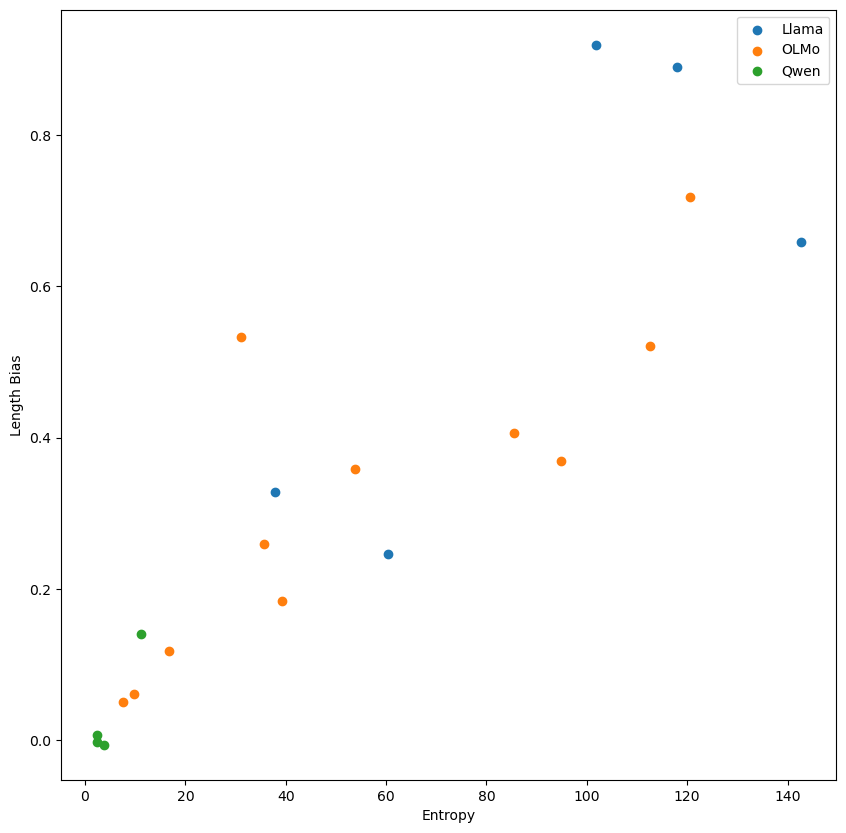

In [6]:
def simple_scatter2(df, x_col,y_col, annotate=False, label_by="task_name"):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    for col_val in df[label_by].unique():
        filtered_df=df[df[label_by]==col_val]
        x=list(filtered_df[x_col].values)
        y=list(filtered_df[y_col].values)

        ax.scatter(x,y, label=col_val)
        if(annotate):
            n=filtered_df["model_name"]
            for i, txt in enumerate(n):
                x_offset=1.5
                y_offset=0
                if(y[i]>8):
                    if txt=="Llama 1B Instruct":
                        x_offset=-17.5
                        y_offset=1
                    ax.annotate(txt, (x[i]+x_offset, y[i]+y_offset))
    ax.legend()

simple_scatter2(df, 'Entropy', "Length Bias", annotate=True, label_by="model_suite")

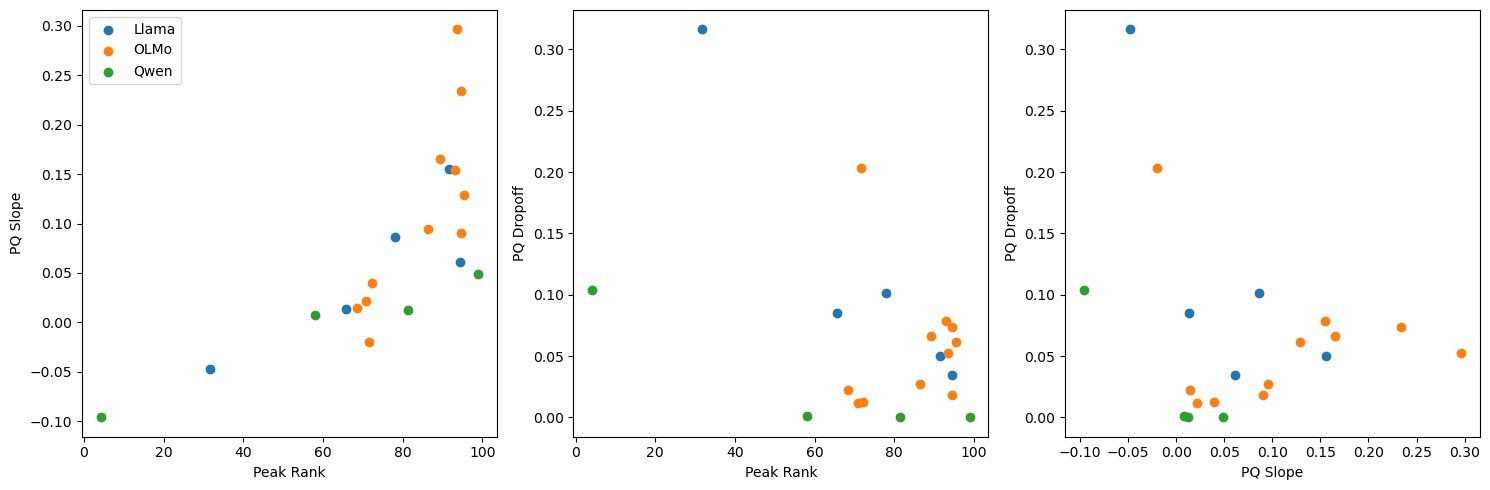

In [7]:
# def simple_scatter(df, x_col,y_col, annotate=False, label_by="task_name"):
#     fig, ax = plt.subplots(figsize=(10,10))
#     ax.set_xlabel(x_col)
#     ax.set_ylabel(y_col)

#     for col_val in df[label_by].unique():
#         filtered_df=df[df[label_by]==col_val]
#         x=list(filtered_df[x_col].values)
#         y=list(filtered_df[y_col].values)

#         ax.scatter(x,y, label=col_val)
#     ax.legend()





fig, axes = plt.subplots(1,3, figsize=(15,5))

simple_scatter(df, y_metrics[1], y_metrics[0], label_by="model_suite", ax=axes[0])

simple_scatter(df, y_metrics[0], y_metrics[2], label_by="model_suite", ax=axes[2])

simple_scatter(df, y_metrics[1], y_metrics[2], label_by="model_suite", ax=axes[1])

axes[0].legend()

fig.tight_layout()

# imple_scatter(df, x_col,y_col, annotate_func = lambda y, i : False, label_by="task_name", ax=None):